Introduction
---

We have two datasets about heating my house which we'll be working with in this problem. We will be using the following equations that describe heat transfer. The first is Newton's law of cooling, which relates the heat transfer into my house from outdoors:

$$
\frac{dQ_{\textrm{trans}}}{dt} = \alpha (T_h - T_c)
$$

where $\alpha$ is the heat transfer coefficient (HTC), $T_h$ is the temperature of the house, and $T_c$ is the outdoor temperature. $dQ_\textrm{trans} /dt$ is the rate of change in energy. The second equation relates to how much energy it takes to raise the temperature in my house:

$$
\frac{dQ_{\textrm{hosue}}}{dT} = c_p \frac{dT_h}{dt}
$$

where $c_p$ is the heat capacity. The last equation is the energy balance:

$$
\frac{dQ_{\textrm{trans}}}{dt} + \frac{dQ_{\textrm{house}}}{dt} + \frac{dQ_{\textrm{heat}}}{dt} = 0
$$

where $Q_{\textrm{heat}}$ is the heat provided by my furnace. Answer the following questions using the three datasets.

### Your Answers

You may insert as many Python cells as you need, but report your answers in the provided markdown cells and your plots in the provided python cells

Problem 1 &mdash; Calculating the HTC
---

#### Problem 1.1
If the furnace is not on, $\frac{dQ_{\textrm{heat}}}{dt} = 0$. Rearrange the given equations to isolate $\alpha / c_p$ on one side.

$$
\frac{\alpha}{c_p} = -\frac{1}{T_h - T_c}\frac{dT_h}{dt}
$$

#### Problem 1.2

In order to access times when the furnace is not on, I've added a column called `center_diff_valid` which is `True` when the furnace is running neither one time-point before or after, so that computing a central difference derivative will not include the spurious influence of the furnace. Use that column to create a plot of the indoor temperature vs time when the furnace is off. Use the `november.csv` dataset for this problem. Your plot should be in units of days vs degrees Fahrenheit. Use the '.' markerstyle. Use the `pandas` library to read the csv file (see lecture example from hypothesis testing for examples of how to do this). 

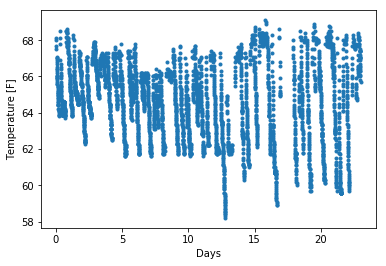

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('november.csv')
ind = data['center_diff_valid']
plt.plot(data['time'][ind] / (60 * 60 * 24), data['temp'][ind], '.')
plt.ylabel('Temperature [F]')
plt.xlabel('Days')
plt.show()

#### Problem 1.3

Compute the numerical time derivative of the house temperature to get an estimate of $\frac{\alpha}{c_p}$ in inverse hours. at each time point. Check your answer by plotting $\frac{\alpha}{c_p}$ over time: it should be centered around a constant value. You can work with a Pandas column like a `numpy` array via the following syntax:

```python
temperature = data['temp'][data['center_diff_valid']].values
```

make sure you axis labels are correct and again use days as the $x$-axis

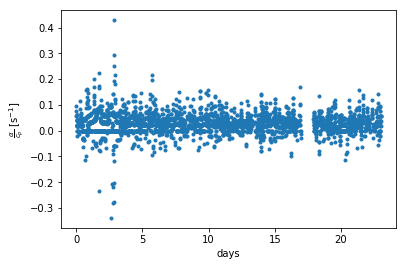

In [55]:
Th = data['temp'][ind].values
Tc = data['outdoor_temp'][ind].values
time = data['time'][ind].values
diff = (Th[1:] - Th[:-1]) / (time[1:] - time[:-1])
acp = -60 * 60 * 0.5 / (Th[1:-1] - Tc[1:-1]) * (diff[1:] + diff[:-1])
plt.plot(time[1:-1] / (60 * 60 * 24), acp, '.')
plt.xlabel('days')
plt.ylabel(r'$\frac{\alpha}{c_p}$ [s$^{-1}$]')
plt.show()

#### Problem 1.4

Compute a 95% confidence interval and plot a histogram for the value of $\frac{\alpha}{c_p}$. Report your value in inverse hours. Some of your values will not a numbers due to divide-by-zero. Use the following trick to remove them:

```python
nans = np.isnan(data)
clean_data = data[not nans]
```

0.028921331999926896 +/- 0.0011548939837811535


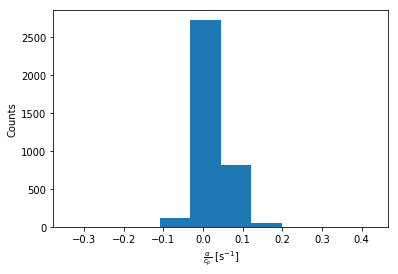

In [65]:
import scipy.stats as ss
xbar = np.nanmean(acp)
se = np.nanstd(acp) / np.sqrt(len(acp))
y = ss.norm.ppf(0.975)
print('{} +/- {}'.format(xbar, y * se))

plt.hist(acp[np.isnan(acp) == False])
plt.xlabel(r'$\frac{\alpha}{c_p}$ [s$^{-1}$]')
plt.ylabel('Counts')
plt.show()

The 95% confidence interval for $\frac{\alpha}{c_p}$ is 0.0289 $\pm$ 0.001 inverse hours

Problem 2 &mdash; Comparing Datasets
----

The second dataset, `december.csv`, is data on my house heating after insulation has been installed in the attic and basement. The insulation has a negligible influence on $c_p$. Using a hypothesis test, make an argument about if the insulation changed the HTC and report the percent improvement, if any.

In [66]:
acp_pre = acp

data = pd.read_csv('december.csv')
ind = data['center_diff_valid']
Th = data['temp'][ind].values
Tc = data['outdoor_temp'][ind].values
time = data['time'][ind].values
diff = (Th[1:] - Th[:-1]) / (time[1:] - time[:-1])
acp_post = -60 * 60 * 0.5 / (Th[1:-1] - Tc[1:-1]) * (diff[1:] + diff[:-1])

print(np.nanmean(acp_post), np.nanmean(acp_pre))
print(ss.ranksums(acp_pre, acp_post))
print((np.nanmean(acp_post) - np.nanmean(acp_pre)) / np.nanmean(acp_pre))

0.026597999901 0.0289213319999
RanksumsResult(statistic=4.1865523730121579, pvalue=2.8322360421747631e-05)
-0.0803328179677


The improvement was significant ($p$-value < 0.05) with an reduction in the heat transfer coefficient of 8%.